packages: matplotlib, pandas, numpy, scikit-learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('spotify_churn_dataset.csv')

df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [3]:
# missing vals?
print(f"Missing Value = \n{df.isnull().sum()}\n")

# shape
print (f'Shape = {df.shape}')

Missing Value = 
user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

Shape = (8000, 12)


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
age,8000.0,37.662125,12.740359,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.068250,84.015596,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.127250,28.449762,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.943875,13.617953,0.0,0.00,0.0,5.00,49.0
offline_listening,8000.0,0.747750,0.434331,0.0,0.00,1.0,1.00,1.0
is_churned,8000.0,0.258875,0.438044,0.0,0.00,0.0,1.00,1.0


In [5]:
# get values and labels
X, y = df.drop(columns=['is_churned', 'user_id']), df['is_churned']

In [6]:
# one hot encoding
X = pd.get_dummies(X)

In [7]:
from sklearn.model_selection import train_test_split

# test/train splits
X_train, X_test, y_train, y_test =\
    train_test_split(X
                     , y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, 
                                random_state=1)
forest.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


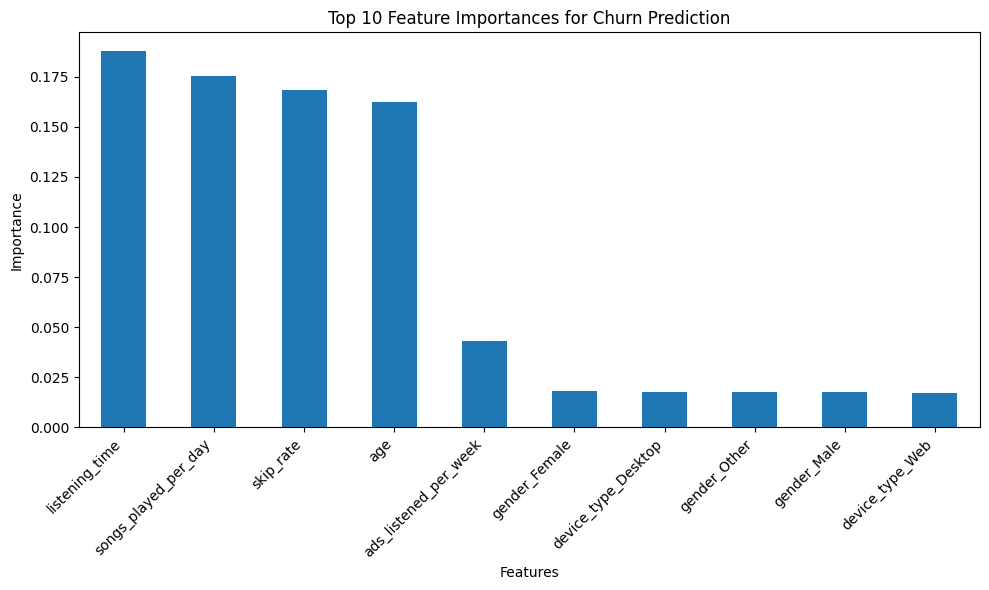

In [9]:
# feature importance
importances = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances for Churn Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# plt.savefig('feature importances.jpeg')
plt.show()

In [10]:
# predict

y_pred = forest.predict(X_test)
score = forest.score(X_test, y_test)
print(f'Random forest accuracy: {score:.4f}')

Random forest accuracy: 0.7381
